속변수의 형태에 따라 분류와 회귀 문제로 나뉜다.

 종속변수가 범주형일 경우 Decision Tree Classification으로 분류를 진행하고, 종속변수가 연속형일 경우 Decision Tree Regression으로 회귀를 진행

In [1]:
# 패키지 로드
from sklearn import tree

In [2]:
# 데이터 셋 생성
X = [[0,0],[1,1]]
Y = [0,1]

In [3]:
X

[[0, 0], [1, 1]]

In [4]:
Y

[0, 1]

In [5]:
# 의사결정 나무 적합 및 학습데이터 예측
clf = tree.DecisionTreeClassifier()#범주형
clf = clf.fit(X,Y)

In [6]:
clf.predict([[1,1]])

array([1])

In [7]:
# 라이브러리 import & 실습 데이터 로드
from sklearn import tree
from sklearn.datasets import load_iris
from os import system #graphviz 라이브러리 설치를 위함

import graphviz

In [8]:
iris = load_iris()
# 4개의 feature 변수 와 3 개의 target 변수가 존재함

In [9]:
# 의사결정 분류 나무
clf = tree.DecisionTreeClassifier() #종속변수가 현재 범주형 
clf = clf.fit(iris.data , iris.target) # feature , target

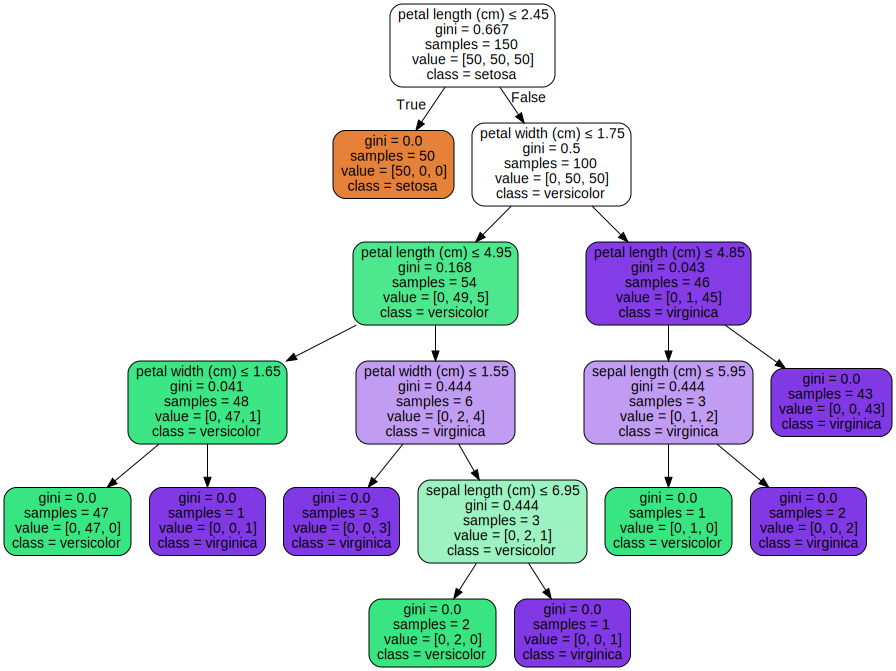

In [10]:
# 의사 결정 분류나무 시각화
dot_data = tree.export_graphviz(clf, # 의사결정나무 모형을 대입한다
                                out_file = None , #file로 변환할것인가
                                feature_names = iris.feature_names , #feature 이름
                                class_names = iris.target_names, # target 이름
                                filled =True , #그림에 색상을 넣을것인가
                                rounded = True , # 반올림을 진행할 것인가
                                special_characters = True #특수문자 사용할거?
                               )

graph = graphviz.Source(dot_data)
graph

# 엔트로피와 마찬가지로 지니계수또한 낮을수록 좋음
# gini가 낮을수록 분류가 잘된것
# 의사결정나무는 기본적으로 information Gain을 낮추는 방향으로 분류는 진행

# 지니계수 0.0

# 엔트로피 매개변수 추가
 즉 분류기준을 엔트로피로 하겠다 라는 뜻

In [11]:
# 의사결정나무 분류 
clf2 = tree.DecisionTreeClassifier(criterion = "entropy")  # Information Gain - entropy
clf2 = clf2.fit(iris.data, iris.target)                    # feature, target

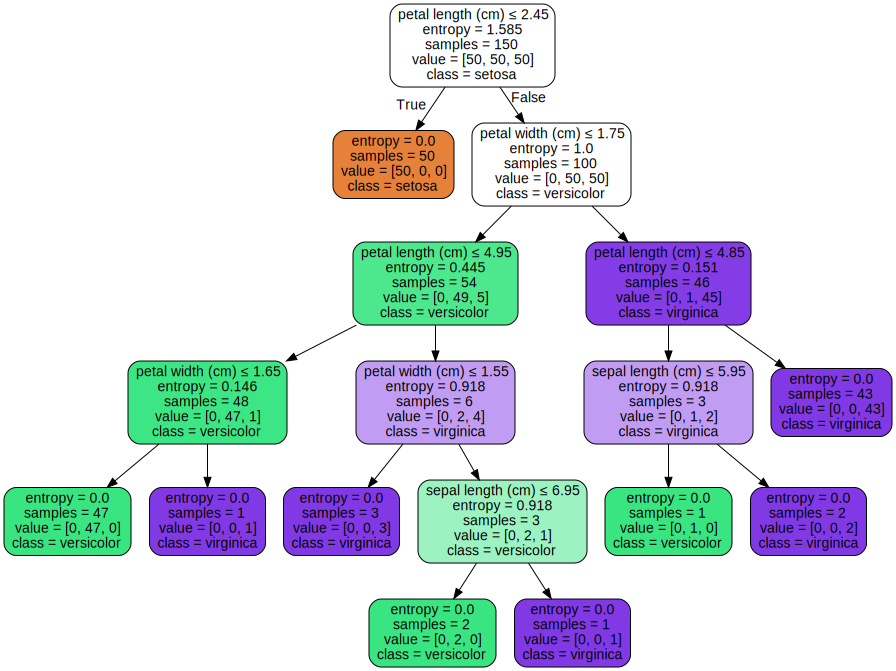

In [12]:
# 시각화
dot_data2 = tree.export_graphviz(clf2,        # 의사결정나무 모형 대입
                               out_file = None,     # file로 변환할 것인가
                               feature_names = iris.feature_names, # feature 이름
                               class_names = iris.target_names,   # target 이름
                               filled = True,        # 그림에 색상을 넣을것인가
                               rounded = True,       # 반올림을 진행할 것인가
                               special_characters = True)    # 특수문자를 사용하나

graph2 = graphviz.Source(dot_data2)              
graph2

# 마지막 노드에서 gini와 entropy 모두 0.0을 출력한다. 이는 완벽하게 분리시켰다고 말할 수 도 있지만, \
# 사실 억지로 분류시킨 것에 가깝다. 
# 그렇기에 과적합(Overfitting)이 발생한 것

# 엔트로피 계수 0.0

색은 3가지 색의 계열로 이루어져 있다. <br> 
같은 색 계열이면 같은 집단으로 분류를 한 것이며, <br>
색이 진할수록 Information Gain(entropy, gini .. )이 낮은 것이다. <br>
즉, 정확하게 분류를 했다는 것이다. 이는 상대적이기에 depth가 작으면 entropy가 높아도 진하게 출력될 수 있다<br>

# pruning(가지치기)라는 기법으로 과적합을 방지

In [13]:
# Pruning
clf3 = tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 2)
clf3.fit(iris.data,iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# 가지 치기방법
1) 지니계수/엔트로피와 같은 Information Gain의 값이 일정 수준 이하로 안내려가도록



2) 가지의 개수 자체를 제한하는 방법



3) 깊이를 제한하는 방법 # Cross Validation을 통해 보다 정확한 깊이를 찾아낼 수 있다.

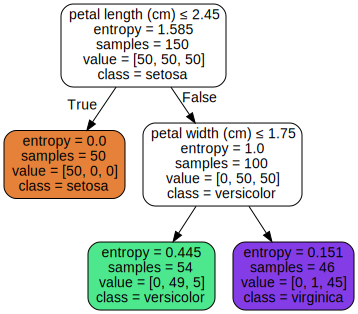

In [14]:
# 시각화
dot_data3=tree.export_graphviz(clf3, # 의사결정 나무 모형을 대입한다.
                              out_file=None , # file로 변환할것인가
                              feature_names=iris.feature_names, # feature 이름
                              class_names=iris.target_names, #target 이름
                              filled = True, # 그림에 색상넣을것인가
                              rounded=True, # 반올림을 진행할 것인가
                              special_characters=True) #특수문자를 사용할것인가

graph3 = graphviz.Source(dot_data3)
graph3

# Confusion matrix로 정확도 비교

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
# 1번 의사결정나무 - 지니계수 활용
confusion_matrix(iris.target,clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [17]:
# 2번 의사결정나무  - entropy 활용
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [18]:
# 3번 의사결정 나무  -가지치기 작업한것
confusion_matrix(iris.target,clf3.predict(iris.data))

# 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다.
# 하지만 학습 데이터를 분류한 것이라는 사실을 염두할 필요가있다.
# 만약에 새로운 데이터 들어온다면 
# 「마지막 가지치기의 의사결정 나무가가 일반화된 특징을 잡을 가능성이 높다.」

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

# Traing Set / Test Set 구분

In [23]:
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split as tts

In [24]:
X_train,X_test,y_train,y_test = tts(iris.data #feature 
                                   ,iris.target # target
                                   ,stratify = iris.target # 층화추출법
                                   ,random_state =1  # 난수고정
                                   )
# iris 데이터의 갯수 150개 (매우적음)
# 무작위 추출을 할시 target이 치우쳐질 우려있음
# 적은상태에서 고루고루 데이터 추출을 위해서 층화추출법을 사용

# train dataset

In [25]:
clf4 =  tree.DecisionTreeClassifier(criterion = 'entropy')
clf4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
# test set predict confusion matrix
confusion_matrix(y_test,clf4.predict(X_test))

# 결과 3번에서 한경우에 오분류 발생
# train data set 과 test data set 의 특성이 어느정도 달라서
# 학습의 분류 결과가 완전하게 맞을 순없다는것을 보여준다.

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

# Decision regression Tree(의사결정회귀나무)
의사결정 회귀나무는 종속변수가 연속형 변수일때 진행한다.<br>
기본적인 방식은 의사결정 분류나무와 동일하나  사용 함수가 다르다
- 회귀나무에서는 mse를 낮추는 방향으로 가지를 뻗어나가야한다.

In [27]:
# 라이브러리
import numpy as np
from sklearn.tree import DecisionTreeRegressor # 회귀나무 함수
import matplotlib.pyplot as plt

np.random.seed seed를 통한 난수 생성<br>
<br>
np.random.randint : 모두(시작,n-1)사이의 랜덤숫자1개 생성 <br>
np.random.rand(m,n) : 0~1의 균일분포에서 (표준정규분포)난수 matrix array(m,n)생성<br>
np.random.randn : 평균0,표준편차1의 가우시안 (표준 정규 분포) 난수를 matrix array생성<br>
<br>
np.random.shuffle 기존의 데이터의 순서 바꾸기<br>
np.random.choice 기존의 데이터에서 sampling<br>
np.unique 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트를 출력<br>
np.bincount 발생하지 않은 사건에 대해서도 카운트를 해준다<br>

In [28]:
# 실습용 데이터 셋만들기
rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80,1),axis=0)
y = np.sin(X).ravel() # sin함수의 예측을 목표로 한다
y[::5] +=3*(0.5-rng.rand(16))

In [33]:
# X_test set 생성
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]

# Regression Tree 구축

In [37]:
# 깊이가 다른 두 Regression 나무 생성
regr1=tree.DecisionTreeRegressor(max_depth= 2)
regr2=tree.DecisionTreeRegressor(max_depth= 5)

# 두 가지 회귀나무 적합 확인
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [38]:
# 예측 
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [39]:
# 예측 결과물
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

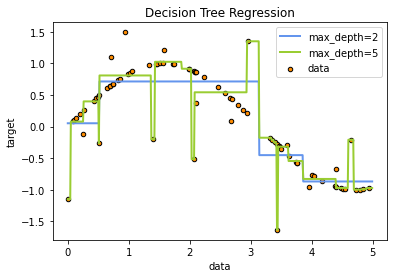

In [40]:
# depth가 다른 두 회귀나무 도식화
plt.figure()
plt.scatter(X,y,s=20,edgecolors='black',
           c='darkorange',label='data')
plt.plot(X_test,y_1,color='cornflowerblue',
        label='max_depth=2',linewidth=2)

plt.plot(X_test,y_2,color='yellowgreen',label='max_depth=5',linewidth=2)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

위의 그림을 확인해보면 max_depth = 5인 의사결정회귀나무는 이상값에 영향을 더 크게 받았음을 확인할 수 있다.<br>
오히려 max_depth = 2의 의사결정회귀나무가 이상값을 무시하고 전체적인 추세를 더 잘 잡는 것을 확인할 수 있다. <br>
 하지만 만약 sin함수에서 떨어져있는 점들이 이상값이 아니었다면, 저런 점들 또한 고려할 필요가 생긴다. <br>
그렇기에 가지치기의 적절한 기준을 찾는 것 또한 분석가의 안목에 달려있다.

# depth = 5 인 의사결정 회귀나무 시각화
- value가 낮을 수록 같은 색계열에서 연한색을 띈다
- value가 높을 수록 같은 색계열에서 진한색을 띈다

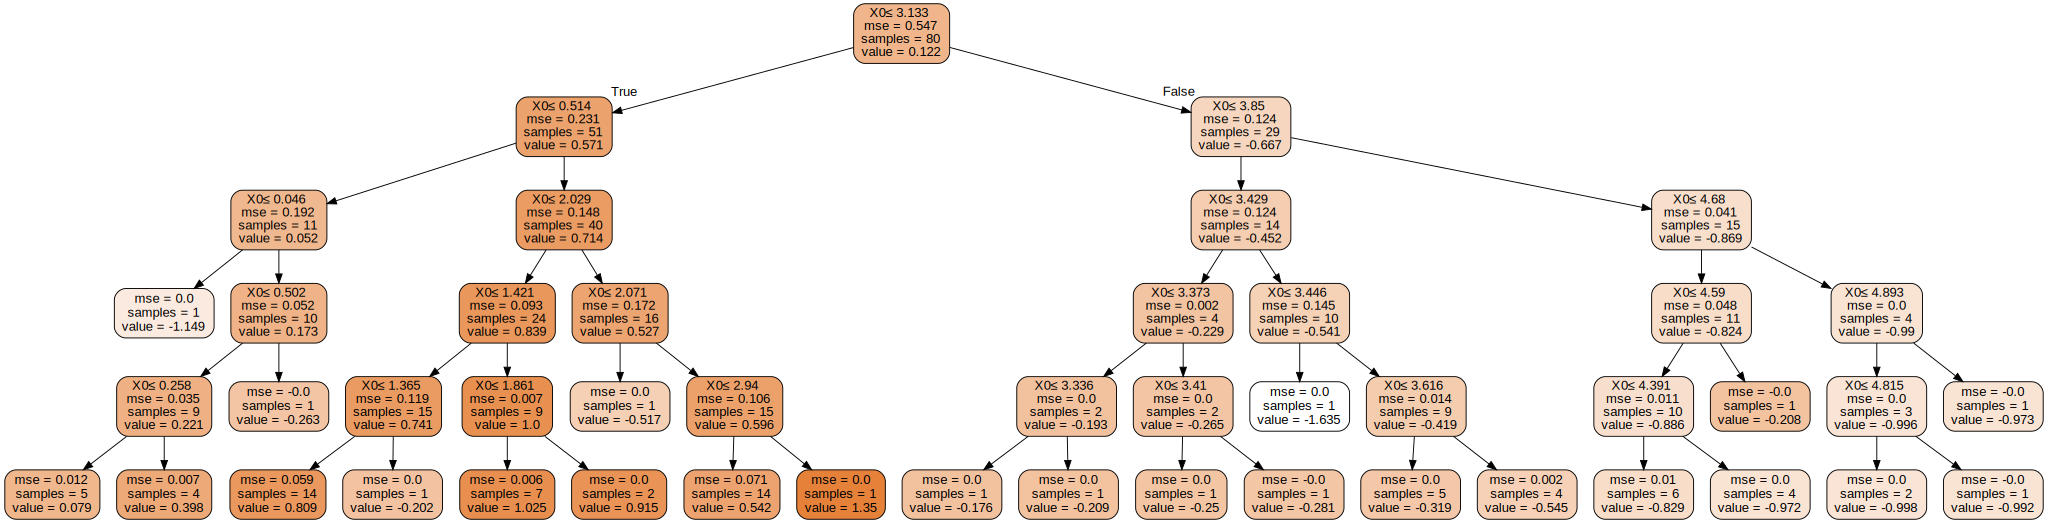

In [43]:
dot_data4 = tree.export_graphviz(regr2,
                                 out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph4 = graphviz.Source(dot_data4)
graph4

# depth =2 의사결정 회귀나무 시각화
mse를 낮추는 방향으로 가지를 뻗어나가야 좋은것

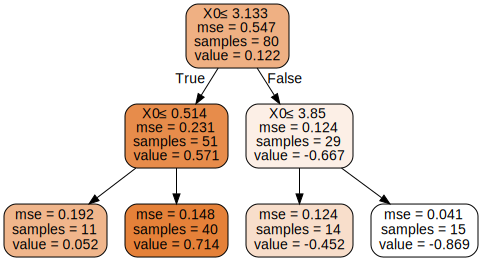

In [44]:
dot_data5 = tree.export_graphviz(regr1,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph5=graphviz.Source(dot_data5)
graph5